In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np 
from sklearn.metrics import accuracy_score

class Model:
    def __init__(self):
        self.model = None
        self.target = None
        self.features = None
        self.data = None
        self.testX = None
        self.testY = None
        self.trainX = None
        self.trainY = None
        
    def _readDataset(self, filename):
        self.data = pd.read_csv(filename)

    def _dropNulls(self):
        self.data.drop(["education"], axis = 1, inplace = True) #dropping this improved accuracy
        self.data.dropna(inplace = True)
    
    def _saveProcessedData(self):
        self.features = self.data.drop("TenYearCHD", axis = 1)
        self.target = self.data.TenYearCHD
        
    def _trainTestSplit(self):
        self.trainX, self.testX, self.trainY, self.testY = train_test_split(self.features, self.target, test_size=0.2)
    
    def preProcessing(self, filename):
        self._readDataset(filename)
        self._dropNulls()
        self.data.reset_index(drop = True)
        self._saveProcessedData()
        self._trainTestSplit()
        #display(self.data.corr())

In [27]:
tree1 = DecisionTreeClassifier(max_depth = 5)
model = Model()
model.preProcessing("framingham.csv")

tree1.fit(model.trainX, model.trainY)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[Text(158.30217391304348, 199.32, 'X[1] <= 50.5\ngini = 0.259\nsamples = 2999\nvalue = [2540, 459]'),
 Text(70.96304347826087, 163.07999999999998, 'X[9] <= 150.25\ngini = 0.162\nsamples = 1670\nvalue = [1522, 148]'),
 Text(36.391304347826086, 126.83999999999999, 'X[11] <= 39.09\ngini = 0.141\nsamples = 1531\nvalue = [1414, 117]'),
 Text(21.834782608695654, 90.6, 'X[8] <= 424.5\ngini = 0.137\nsamples = 1524\nvalue = [1411, 113]'),
 Text(14.556521739130435, 54.359999999999985, 'X[3] <= 17.5\ngini = 0.135\nsamples = 1522\nvalue = [1411, 111]'),
 Text(7.278260869565218, 18.119999999999976, 'gini = 0.099\nsamples = 992\nvalue = [940, 52]'),
 Text(21.834782608695654, 18.119999999999976, 'gini = 0.198\nsamples = 530\nvalue = [471, 59]'),
 Text(29.11304347826087, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(50.947826086956525, 90.6, 'X[13] <= 77.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(43.66956521739131, 54.359999999999985, 'X[8] <= 219.5\ngini = 0.375\nsam

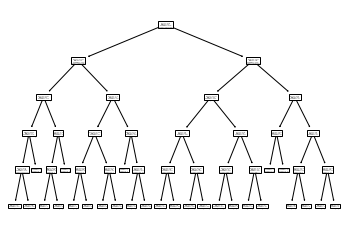

In [28]:
tree.plot_tree(tree1.fit(model.trainX, model.trainY))

In [51]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus 

# export_graphviz(tree, out_file="tree_nonlimited.dot",  
  #              filled=True, rounded=True,
   #             special_characters=True)

dot_data = tree.export_graphviz(tree1, out_file=None, 
                      feature_names=list(model.features.columns))
graph = graphviz.Source(dot_data)  
graph.render('final')
#Image(filename = 'tree_nonlimited.png')

'C:\Users\Mudasir' is not recognized as an internal or external command,
operable program or batch file.


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'final']' returned non-zero exit status 1. [stderr: b"'C:\\Users\\Mudasir' is not recognized as an internal or external command,\r\noperable program or batch file.\r\n"]